# Loan Approval Prediction using Machine Learning

Firstly we have to import libraries : 

- Pandas – To load the Dataframe
- Matplotlib – To visualize the data features i.e. barplot
- Seaborn – To see the correlation between features using heatmap

In [25]:
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

now let's import our dataset file

In [26]:
df= pd.read_csv('./dataset/LoanApprovalPrediction.csv')

The dataset contains 13 features : 

- 1	Loan:	A unique id 
- 2	Gender:	Gender of the applicant Male/female
- 3	Married:	Marital Status of the applicant, values will be Yes/ No
- 4	Dependents:	It tells whether the applicant has any dependents or not.
- 5	Education:	It will tell us whether the applicant is Graduated or not.
- 6	Self_Employed:	This defines that the applicant is self-employed i.e. Yes/ No
- 7	ApplicantIncome:	Applicant income
- 8	CoapplicantIncome:	Co-applicant income
- 9	LoanAmount:	Loan amount (in thousands)
- 10 Loan_Amount_Term:	Terms of loan (in months)
- 11 Credit_History:	Credit history of individual’s repayment of their debts
- 12 Property_Area:	Area of property i.e. Rural/Urban/Semi-urban 
- 13 Loan_Status:	Status of Loan Approved or not i.e. Y- Yes, N-No 

Once we imported the dataset, let’s view it using the below command.

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preprocessing and Visualization
Get the number of columns of object datatype.

In [28]:
obj= (df.dtypes == 'object').sum()
print('Categorical Variables: ', obj)

Categorical Variables:  7


As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [29]:
# Dropping Loan_ID column
df= df.drop('Loan_ID', axis= 1)

Visualize all the unique values in columns using $barplot$. This will simply show which value is dominating as per our dataset.

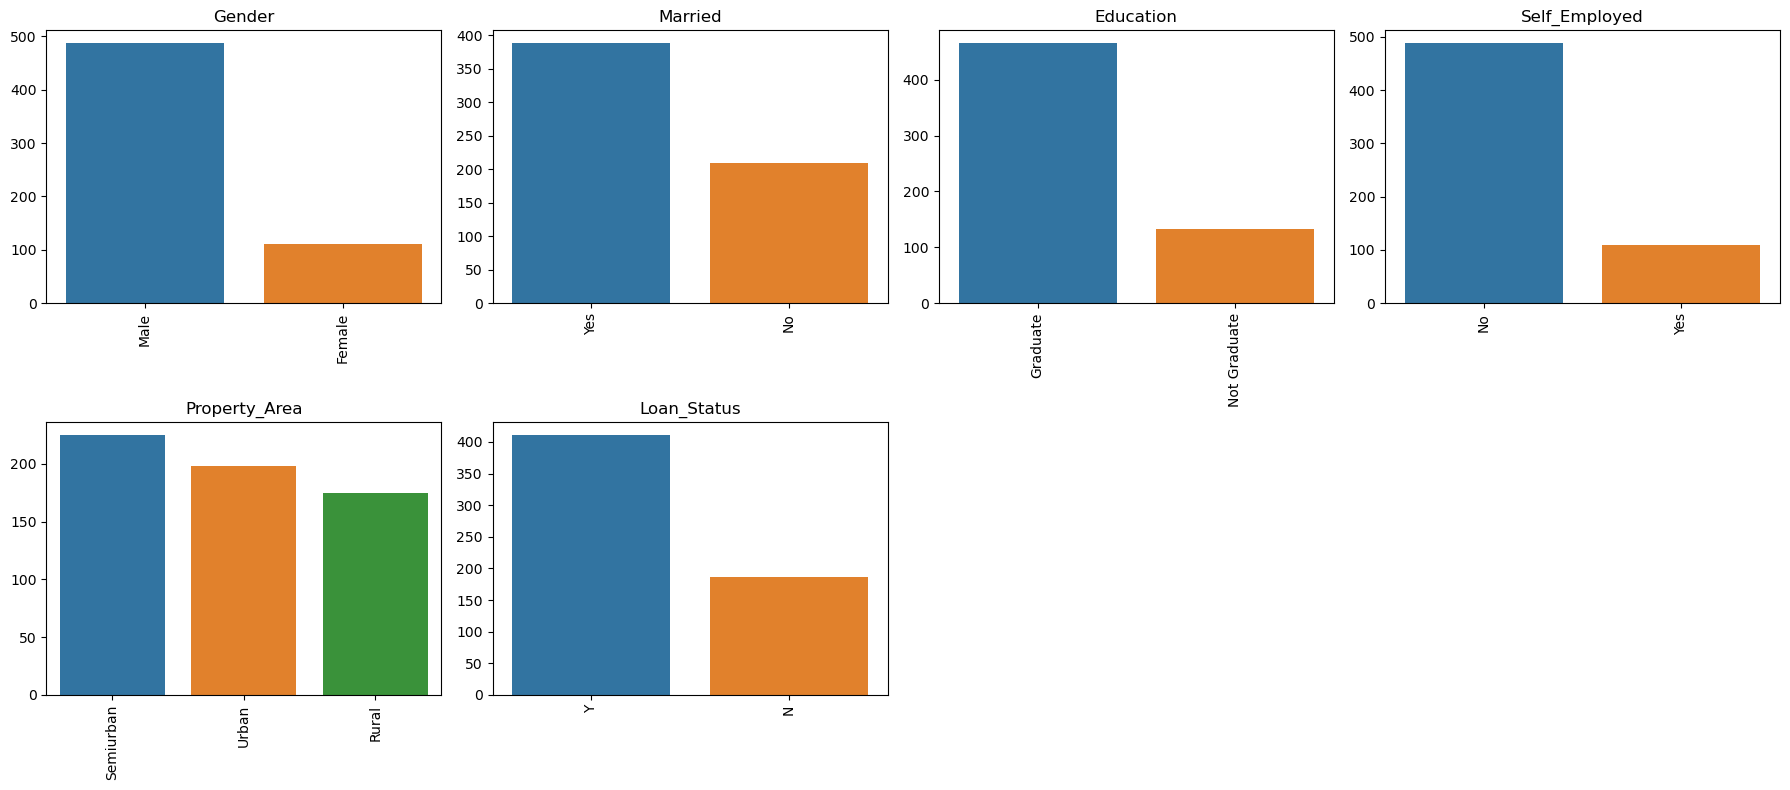

In [30]:
# Identify object columns
obj_cols= df.select_dtypes(include=['object']).columns
num_obj_cols= len(obj_cols)
# Calculate number of rows needed for the subplot grid
rows= ceil(num_obj_cols / 4) # Ensures all plots fit neatly
plt.figure(figsize= (18, rows* 4))
for index, col in enumerate(obj_cols, start= 1):
    plt.subplot(rows, 4, index)
    sns.barplot(x= df[col].value_counts().index, y= df[col].value_counts().values)
    plt.xticks(rotation= 90)
    plt.title(col)
    
plt.tight_layout()
plt.show()

As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [31]:
# label_encoder object knows how 
# to understand word labels.
obj_cols=df.select_dtypes(include=['object']).columns
label_encoder= LabelEncoder()
for col in obj_cols:
    df[col]= label_encoder.fit_transform(df[col])

Again check the object datatype columns. Let’s find out if there is still any left.

In [32]:
# To find the number of columns with 
# datatype==object
obj_cols= (df.dtypes == 'object').sum()
print('Categorical Variables',obj_cols)

Categorical Variables 0


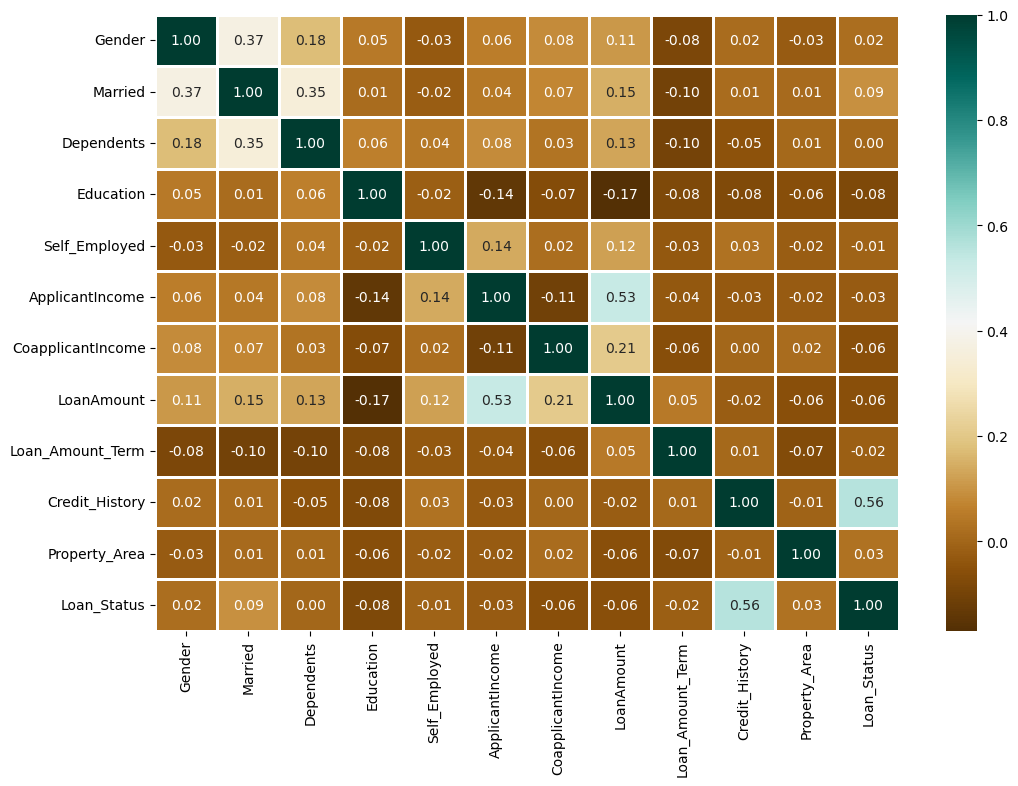

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap= 'BrBG', fmt= '.2f',
            linewidths= 2, annot= True)
plt.show()

The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use $Catplot$ to visualize the plot for the Gender, and Marital Status of the applicant.

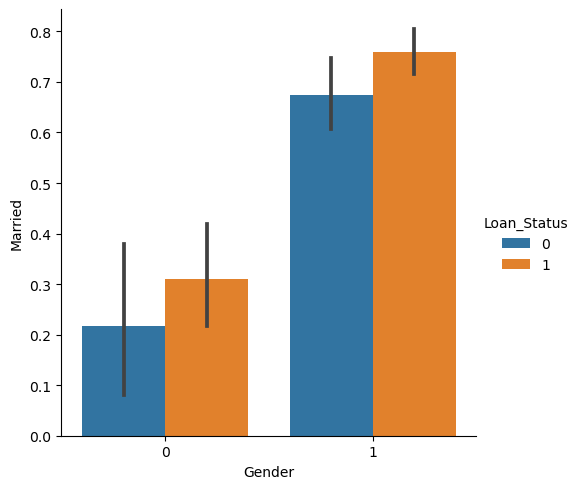

In [34]:
sns.catplot(x= 'Gender', y= 'Married',
            hue= 'Loan_Status', kind= 'bar', data=df )
plt.show()

Now we will find out if there is any missing values in the dataset using below code.

In [35]:
for col in df.columns:
    df[col]= df[col].fillna(df[col].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As there is no missing value then we must proceed to model training.

## Data Splitting

In [36]:
X= df.drop('Loan_Status', axis= 1)
Y= df['Loan_Status']
X.shape, Y.shape

((598, 11), (598,))

In [37]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 40)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((478, 11), (478,), (120, 11), (120,))

## Model Training and Evaluation
As this is a classification problem so we will be using these models : 

- KNeighborsClassifiers
- RandomForestClassifiers
- Support Vector Classifiers (SVC)
- Logistics Regression

To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [38]:
models= [LogisticRegression(max_iter= 1000),
        SVC(),
        KNeighborsClassifier(n_neighbors=3),
        RandomForestClassifier(n_estimators= 7,criterion='entropy',random_state= 7)]
# making predictions on training set
for model in models:
    model.fit(X_train, Y_train)
    Y_pred= model.predict(X_train)
    print('Acuuracy score of', model.__class__.__name__,
          '=', 100*metrics.accuracy_score(Y_train, Y_pred))

Acuuracy score of LogisticRegression = 80.9623430962343
Acuuracy score of SVC = 68.82845188284519
Acuuracy score of KNeighborsClassifier = 78.66108786610879
Acuuracy score of RandomForestClassifier = 98.11715481171548


### prediction on the test set:

In [39]:
# making predictions on the testing set
for model in models:
    model.fit(X_test, Y_test)
    Y_pred= model.predict(X_test)
    print('Accuracy score of', model.__class__.__name__, 
          '=', 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of LogisticRegression = 80.83333333333333
Accuracy score of SVC = 70.83333333333334
Accuracy score of KNeighborsClassifier = 81.66666666666667
Accuracy score of RandomForestClassifier = 97.5


Random Forest Classifier is giving the best accuracy with an accuracy score of 82% for the testing dataset. And to get much better results ensemble learning techniques like Bagging and Boosting can also be used.